<a href="https://colab.research.google.com/github/BartDKbits/Solar-Detection/blob/main/AI4ALL_BLT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Week 3 has seaborn command that will show them all together - Correlation matrix shows how each is correlated

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#"C:\Users\bsche\OneDrive\Desktop\Dev\AI4ALL\Project\Pasion et al dataset.csv" <-- IDK how to get downloads for us all to see
# df = pd.read_csv("/Pasion et al dataset.csv")
# df = pd.read_csv("/content/sample_data/Pasion et al dataset.csv")

#Nah, we gon do it wit google drive
from google.colab import drive
drive.mount("/content/drive")

data_dir = "/content/drive/MyDrive/Google_Colab/"
!ls $data_dir
print(f"Data directory set to: {data_dir}")

# df = pd.read_csv(f"{data_dir}Pasion et al dataset (AI4ALL).gsheet")
url = "1QZ16T9cNLx-2pKAqvwO_BYOIx5mi3Cvyb4K4LHfo46M" #how is this url working for everyone??
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{url}/export?format=csv")


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [ ]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.020000e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.020000e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.020000e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.020000e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.020000e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
"""
plt.subplot(2,1,1)

plt.scatter(df.YRMODAHRMI, df.Date)
plt.xlabel('YR-MO-DA-HR-MI')
plt.ylabel('Date')
plt.title('YR-MO-DA-HR-MI vs Date')
plt.xlim(2.017045e11, 2.01713e11)
plt.ylim(2.01705e7, 2.01713e7)
plt.show()

plt.subplot(2,1,2)

plt.scatter(df.YRMODAHRMI, df.Time)
plt.xlabel('YR-MO-DA-HR-MI')
plt.ylabel('Time')
plt.title('YR-MO-DA-HR-MI vs Time')
plt.xlim(2.017045e11, 2.01713e11)
# plt.ylim(2.01705e7, 2.01713e7)
plt.show()
"""

"\nplt.subplot(2,1,1)\n\nplt.scatter(df.YRMODAHRMI, df.Date)\nplt.xlabel('YR-MO-DA-HR-MI')\nplt.ylabel('Date')\nplt.title('YR-MO-DA-HR-MI vs Date')\nplt.xlim(2.017045e11, 2.01713e11)\nplt.ylim(2.01705e7, 2.01713e7)\nplt.show()\n\nplt.subplot(2,1,2)\n\nplt.scatter(df.YRMODAHRMI, df.Time)\nplt.xlabel('YR-MO-DA-HR-MI')\nplt.ylabel('Time')\nplt.title('YR-MO-DA-HR-MI vs Time')\nplt.xlim(2.017045e11, 2.01713e11)\n# plt.ylim(2.01705e7, 2.01713e7)\nplt.show()\n"

In [ ]:
df2 = df.drop(columns=['PolyPwr'])

Why isn't the 8 lines horizontal if YRMODAHRMI is more specific?


In [ ]:
"""
plt.subplots(math.ceil(df2.columns.size/2),2,figsize=(10,30))
for feature in df2.columns:
  # plt.subplot(df2.columns.get_loc(feature)+1) # why can't I use this if the rows and columns are already defined above??
  plt.subplot(math.ceil(df2.columns.size/2),2,df2.columns.get_loc(feature)+1)
  #Get size to display all
  plt.title(feature)

  plt.scatter(df2[feature], df.PolyPwr)
  #,figsize=(10,10)
  """

"\nplt.subplots(math.ceil(df2.columns.size/2),2,figsize=(10,30))\nfor feature in df2.columns:\n  # plt.subplot(df2.columns.get_loc(feature)+1) # why can't I use this if the rows and columns are already defined above??\n  plt.subplot(math.ceil(df2.columns.size/2),2,df2.columns.get_loc(feature)+1)\n  #Get size to display all\n  plt.title(feature)\n\n  plt.scatter(df2[feature], df.PolyPwr)\n  #,figsize=(10,10)\n  "

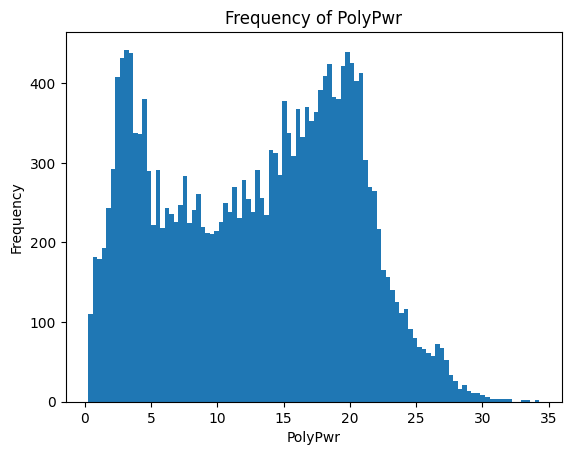

In [ ]:
plt.hist(df.PolyPwr, bins=100)
plt.xlabel('PolyPwr')
plt.ylabel('Frequency')
plt.title('Frequency of PolyPwr')
plt.show()

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


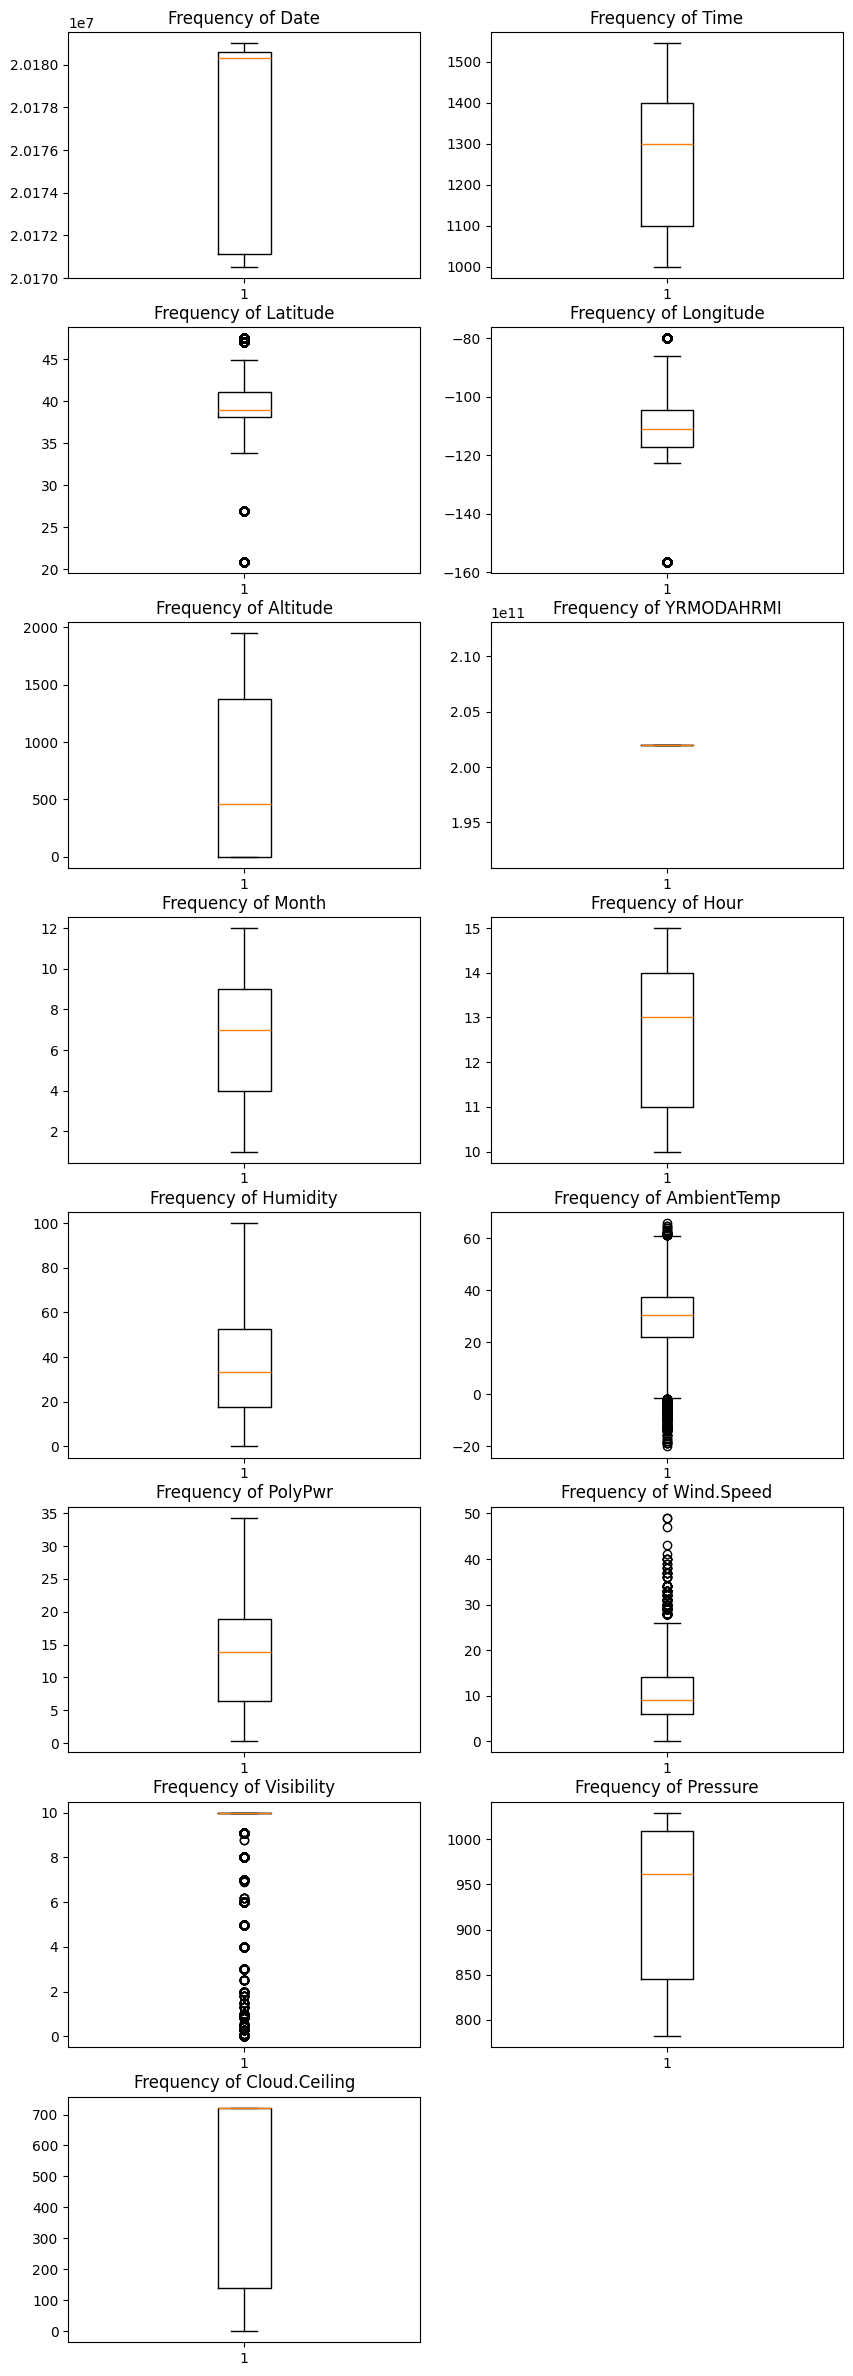

"\nfor feature in dfNumeric.columns:\n  plt.subplot(math.ceil(dfNumeric.columns.size/2),2,dfNumeric.columns.get_loc(feature)+1)\n  axes.boxplot(dfNumeric[feature])\n  # dfNumeric.boxplot(feature)\n  # plt.boxplot(df[feature])\n  # plt.xlabel(feature)\n  plt.ylabel('Frequency')\n  plt.title(f'Frequency of {feature}')\n  plt.show()\n  "

In [ ]:
dfNumeric = df.drop(columns=["Location", "Season"])
fig, axes = plt.subplots(math.ceil(dfNumeric.columns.size/2),2,figsize=(10,30))
print(axes)
axes = axes.flatten()
print(axes)
for i, ax in enumerate(axes):
  if i < len(dfNumeric.columns): #Not sure why this is needed
    ax.boxplot(dfNumeric.iloc[:,i])
    ax.set_title(f'Frequency of {dfNumeric.columns[i]}')
  else:
    ax.axis('off')
plt.show()
"""
for feature in dfNumeric.columns:
  plt.subplot(math.ceil(dfNumeric.columns.size/2),2,dfNumeric.columns.get_loc(feature)+1)
  axes.boxplot(dfNumeric[feature])
  # dfNumeric.boxplot(feature)
  # plt.boxplot(df[feature])
  # plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Frequency of {feature}')
  plt.show()
  """

In [ ]:
"""
We need to change the YRMODAHRMI, Day, Time, and change it so that it will be constant numbers.
Time is now written in HHMM, but we should just do the number of minutes in the day (It will never say 1070 because there are not 70 minutes in an hour)

Time:
Get each digit, and then use the first 2 and multiply them by 60, then add to the first 2 digits to get the number of minutes

Day:
Get the 4 day digits, multiply by 365.25 (round?), next 2 digits multiplied by 30.5?, then add to the last 2 digits to find the total amount of days from 0BC.
Find what the first sample day is. Set that to day 0. This will be done by subtracting each data point (which is now in days), and subtracting the lowest amount of days from each one.

YRMODAHRMI --> Do we even need this if we have the first 2? Also not all the data imported in the spreadsheet
Seasons --> Do we even need this either?
Hour --> Don't need this; I have time

Location --> Do we need this? I feel like looking at it would be good to have even if there are multiple places with similar latitudes and there can be big difference that are based off of location like urban heat island affect, buildings that may produce heat or coldness, etc.
However, we wouldn't be able to put a location like this kind into a model to find the power output
"""

"\nWe need to change the YRMODAHRMI, Day, Time, and change it so that it will be constant numbers.\nTime is now written in HHMM, but we should just do the number of minutes in the day (It will never say 1070 because there are not 70 minutes in an hour)\n\nTime:\nGet each digit, and then use the first 2 and multiply them by 60, then add to the first 2 digits to get the number of minutes\n\nDay:\nGet the 4 day digits, multiply by 365.25 (round?), next 2 digits multiplied by 30.5?, then add to the last 2 digits to find the total amount of days from 0BC.\nFind what the first sample day is. Set that to day 0. This will be done by subtracting each data point (which is now in days), and subtracting the lowest amount of days from each one.\n\nYRMODAHRMI --> Do we even need this if we have the first 2? Also not all the data imported in the spreadsheet\nSeasons --> Do we even need this either?\nHour --> Don't need this; I have time\n\nLocation --> Do we need this? I feel like looking at it would

In [ ]:
#Time:
timeEx = 1149

hours = int(timeEx/100)
minutes = timeEx % 100

totalMinutes = hours*60 + minutes

print(f"Hours: {hours}, minutes: {minutes}. Total minutes: {totalMinutes}")


#Day:
dateEx = 20171021

years = int(dateEx / 10000)
days = dateEx % 100
months = int((dateEx%10000)/100)

totalDays = (years*365.25) + (months*30.5) + days

print(f"Years: {years}, months: {months}, days: {days}. Total days: {totalDays}")

print(f"Unconverted first date: {df["Date"].min()}")


Hours: 11, minutes: 49. Total minutes: 709
Years: 2017, months: 10, days: 21. Total days: 737035.25
Unconverted first date: 20170523


In [ ]:
def convertTime(time):
  hours = int(time/100)
  minutes = time % 100
  totalMinutes = hours*60 + minutes
  totalHours = totalMinutes/60
  return totalHours

def convertDate(date):
  years = int(date / 10000)
  days = date % 100
  months = int((date%10000)/100)
  totalDays = (years*365.25) + (months*30.5) + days
  return totalDays

def dayFromZero(date):
  return convertDate(date) - convertDate(df["Date"].min())

print(convertTime(1430))
print(convertDate(20180407))
print(dayFromZero(20180407))

14.5
737203.5
318.75


In [ ]:
df3 = df.drop(columns=['YRMODAHRMI', 'Season', 'Location', "Hour"])
df3['Time'] = df3['Time'].apply(convertTime)
df3['Date'] = df3['Date'].apply(dayFromZero)
# df3.head()
# df3 = df3.drop(columns=["PolyPwr"])
df3.head()

,Date,Time,Latitude,Longitude,Altitude,Month,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,193.5,11.75,47.11,-122.57,84,12,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,193.5,13.25,47.11,-122.57,84,12,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,193.5,13.50,47.11,-122.57,84,12,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,194.5,12.50,47.11,-122.57,84,12,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,194.5,14.25,47.11,-122.57,84,12,54.80347,16.85471,6.57939,3,3.0,1023.7,9


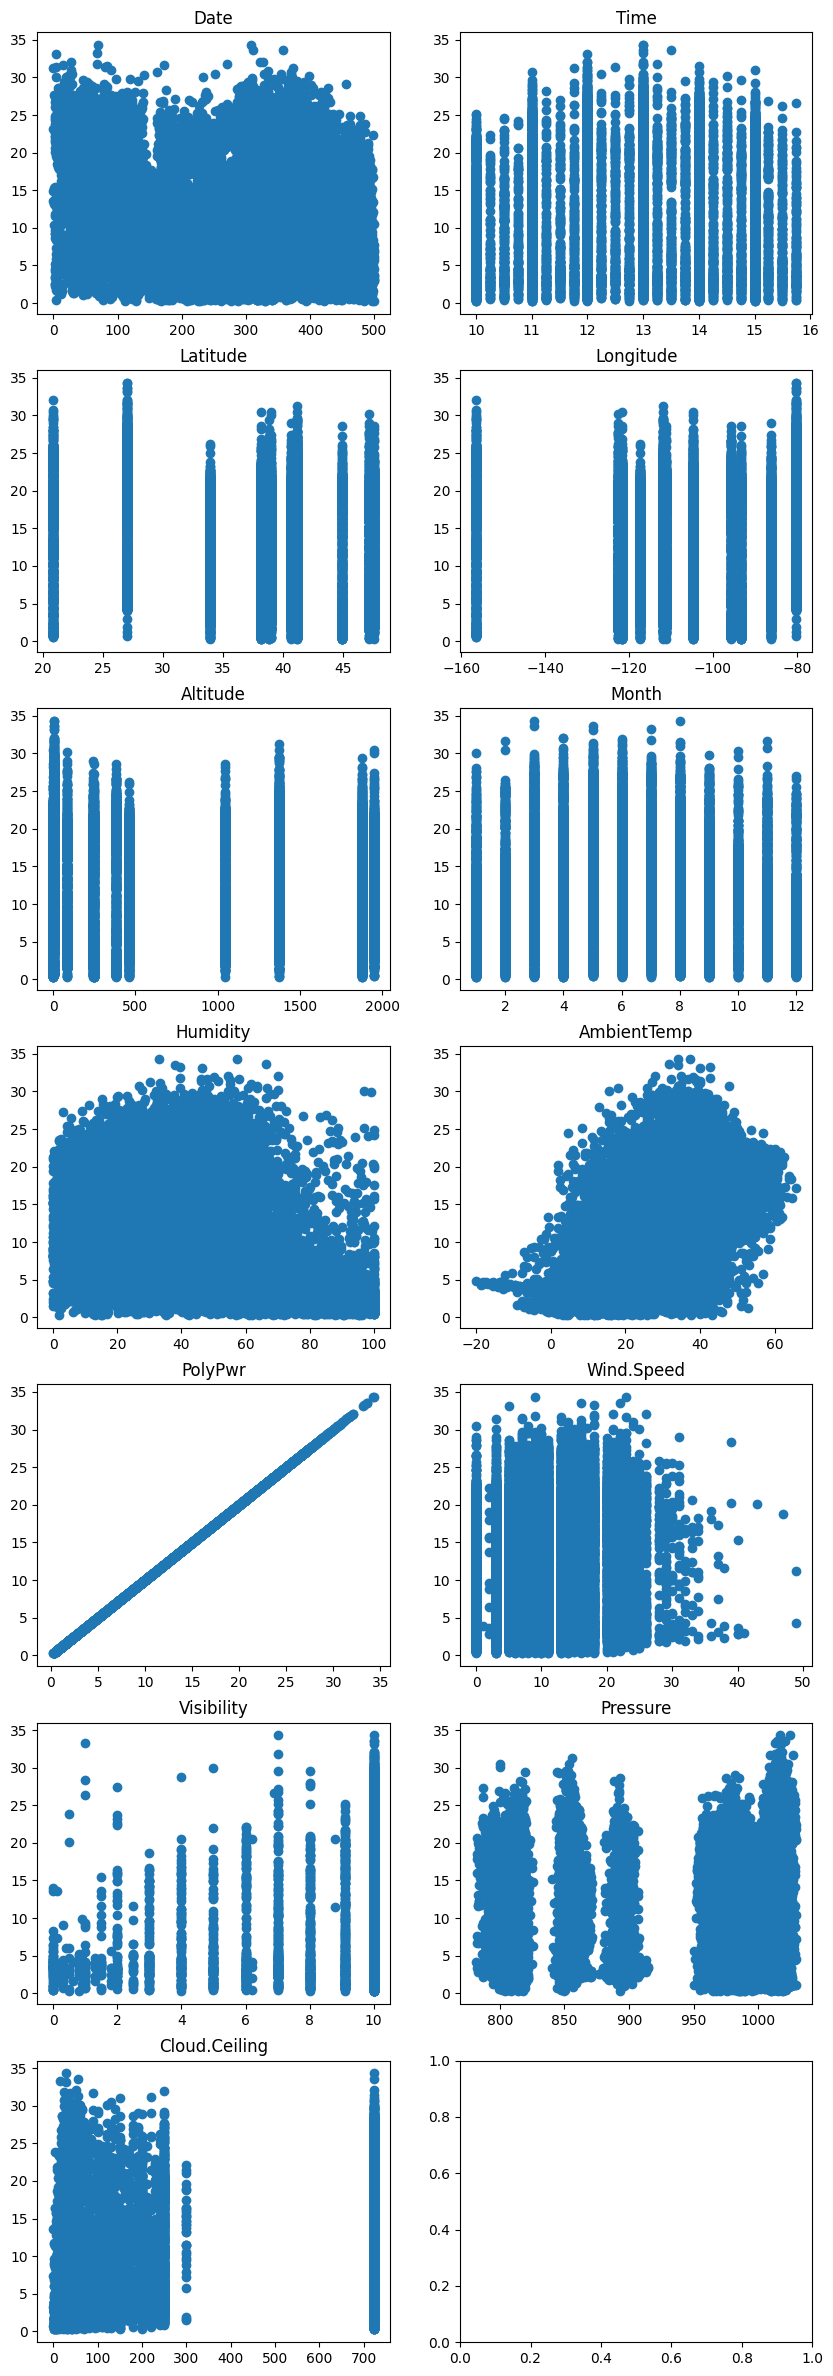

In [ ]:
plt.subplots(math.ceil(df3.columns.size/2),2,figsize=(10,30))
for feature in df3.columns:
  plt.subplot(math.ceil(df3.columns.size/2),2,df3.columns.get_loc(feature)+1)
  plt.title(feature)
  plt.scatter(df3[feature], df.PolyPwr)

In [ ]:
#Boxplot for each month
#Boxplot per hour
#boxplot per location

In [ ]:
"""
DecisionBoundaryDisplay.from_estimator(
  estimator: The trained classifier (e.g., a model like LogisticRegression, SVC, etc.).
  X: Input data (array-like of shape (n_samples, n_features)). For visualization, it should ideally have 2 features.
  grid_resolution: (default: 100) The resolution of the grid used to plot the decision boundary.
  response_method: (default: 'auto') Determines whether to use predict_proba, decision_function, or predict to get the response.
  plot_method: (default: 'contourf') The plotting method, either 'contourf' (filled contours) or 'contour' (lines).
  ax: (optional) Matplotlib axes object to plot on.
"""
# DecisionBoundaryDisplay.from_estimator(

# )

"\nDecisionBoundaryDisplay.from_estimator(\n  estimator: The trained classifier (e.g., a model like LogisticRegression, SVC, etc.).\n  X: Input data (array-like of shape (n_samples, n_features)). For visualization, it should ideally have 2 features.\n  grid_resolution: (default: 100) The resolution of the grid used to plot the decision boundary.\n  response_method: (default: 'auto') Determines whether to use predict_proba, decision_function, or predict to get the response.\n  plot_method: (default: 'contourf') The plotting method, either 'contourf' (filled contours) or 'contour' (lines).\n  ax: (optional) Matplotlib axes object to plot on.\n"

In [ ]:
"""
# USING DF DATAFRAME ####################################################################################################
##########################################################################
##########################################################################

import seaborn as sns
from sklearn.preprocessing import LabelEncoder



names = [
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
]

# adding a column that contains categorical classifications for PolyPwr
df['PolyPwr_class'] = pd.qcut(
    df['PolyPwr'], q=3, labels=['low', 'medium', 'high']
)

# separating features
X = df.drop(columns=['PolyPwr', 'PolyPwr_class'])
y = df['PolyPwr_class']

# ensuring only numerical types are included
X = X.select_dtypes(include='number')

# splitting data set, leaving some for testing and using some for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# testing for feature importance
# train a model supporting feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

# create a sorted DataFrame for clarity
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# display
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance for Predicting PolyPwr_class')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

df[['PolyPwr', 'PolyPwr_class']].tail(20)
"""

'\n# USING DF DATAFRAME ####################################################################################################\n##########################################################################\n##########################################################################\n\nimport seaborn as sns\nfrom sklearn.preprocessing import LabelEncoder\n\n\n\nnames = [\n    "Random Forest",\n    "Neural Net",\n    "AdaBoost",\n    "Naive Bayes",\n    "QDA",\n    "XGBoost",\n]\n\nclassifiers = [\n    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\n    MLPClassifier(alpha=1, max_iter=1000),\n    AdaBoostClassifier(),\n    GaussianNB(),\n    QuadraticDiscriminantAnalysis(),\n    XGBClassifier(),\n]\n\n# adding a column that contains categorical classifications for PolyPwr\ndf[\'PolyPwr_class\'] = pd.qcut(\n    df[\'PolyPwr\'], q=3, labels=[\'low\', \'medium\', \'high\']\n)\n\n# separating features\nX = df.drop(columns=[\'PolyPwr\', \'PolyPwr_class\'])\ny = df[\'PolyPwr_c

In [ ]:
"""
datasets = [
    ('AmbientTemp', 'Humidity'),
    ('Pressure', 'Cloud.Ceiling'),
    ('Date', 'Time')
]

# transforming polypwr_class into numeric labels (high: 0, low: 1, medium: 2)
encoder = LabelEncoder()
df['PolyPwr_class_num'] = encoder.fit_transform(df['PolyPwr_class'])


figure = plt.figure(figsize=(20, 10))
i = 1

#creating a smaller sample
df_small = df.sample(n=800, random_state=42).copy()

# using numeric column
y_all = df_small['PolyPwr_class_num'].values


for ds_cnt, (f1, f2) in enumerate(datasets):
    # slice your dataframe
    X = df_small[[f1, f2]].values
    y = y_all

    # standardize for mean= 0, std= 1
    X = StandardScaler().fit_transform(X)
    # split data, half is used for training, half for testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # defining boundaries for plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # setting up colormaps, cm is for decision boundary and cm_bright is for data points
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    # Input data plot
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plotting train and test points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(f"{f2}")
    ax.set_xlabel(f"{f1}")
    i += 1

    # Loop through classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # draws decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, response_method="predict", cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, f"{score:.2f}".lstrip("0"), size=12,
                horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()

df[['PolyPwr_class', 'PolyPwr_class_num']].tail(10)
"""

'\ndatasets = [\n    (\'AmbientTemp\', \'Humidity\'),\n    (\'Pressure\', \'Cloud.Ceiling\'),\n    (\'Date\', \'Time\')\n]\n\n# transforming polypwr_class into numeric labels (high: 0, low: 1, medium: 2)\nencoder = LabelEncoder()\ndf[\'PolyPwr_class_num\'] = encoder.fit_transform(df[\'PolyPwr_class\'])\n\n\nfigure = plt.figure(figsize=(20, 10))\ni = 1\n\n#creating a smaller sample\ndf_small = df.sample(n=800, random_state=42).copy()\n\n# using numeric column\ny_all = df_small[\'PolyPwr_class_num\'].values\n\n\nfor ds_cnt, (f1, f2) in enumerate(datasets):\n    # slice your dataframe\n    X = df_small[[f1, f2]].values\n    y = y_all\n\n    # standardize for mean= 0, std= 1\n    X = StandardScaler().fit_transform(X)\n    # split data, half is used for training, half for testing\n    X_train, X_test, y_train, y_test = train_test_split(\n        X, y, test_size=0.4, random_state=42\n    )\n\n    # defining boundaries for plot\n    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5\n   

In [ ]:
"""
X = df.drop(columns=['PolyPwr', 'PolyPwr_class', 'PolyPwr_class_num'])
y = df['PolyPwr_class_num']

X = X.select_dtypes(include='number')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.3f}")
#Accuracy of classifiers classifying the training data?
"""

'\nX = df.drop(columns=[\'PolyPwr\', \'PolyPwr_class\', \'PolyPwr_class_num\'])\ny = df[\'PolyPwr_class_num\']\n\nX = X.select_dtypes(include=\'number\')\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\nfor name, clf in zip(names, classifiers):\n    clf.fit(X_train, y_train)\n    score = clf.score(X_test, y_test)\n    print(f"{name}: {score:.3f}")\n#Accuracy of classifiers classifying the training data?\n'

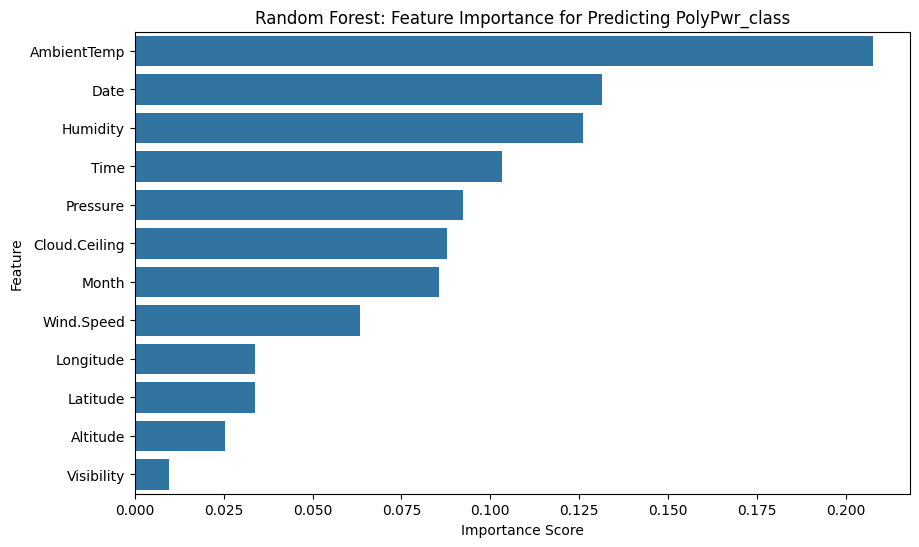

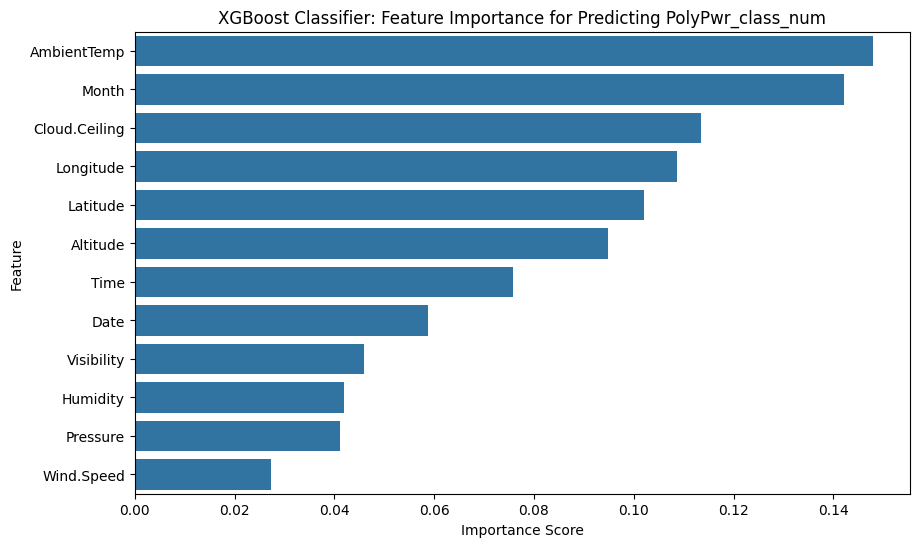

,PolyPwr,PolyPwr_class
21025,16.06221,medium
21026,8.60509,low
21027,9.89453,medium
21028,14.76349,medium
21029,13.28147,medium
21030,11.73785,medium
21031,3.39963,low
21032,3.37862,low
21033,16.39186,medium
21034,10.41800,medium


In [ ]:
# USING DF3 DATAFRAME ##########################
##########################################################################
#########################################################################

import seaborn as sns
from sklearn.preprocessing import LabelEncoder


names = [
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
]

# adding a column that contains categorical classifications for PolyPwr
df3['PolyPwr_class'] = pd.qcut(
    df3['PolyPwr'], q=3, labels=['low', 'medium', 'high']
)

# separating features
X = df3.drop(columns=['PolyPwr', 'PolyPwr_class'])
y = df3['PolyPwr_class']

# ensuring only numerical types are included
X = X.select_dtypes(include='number')

# splitting data set, leaving some for testing and using some for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#######################

# testing for feature importance
# train a model supporting feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

# create a sorted DataFrame for clarity
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# display
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Random Forest: Feature Importance for Predicting PolyPwr_class')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#######################

df3['PolyPwr_class_num'] = LabelEncoder().fit_transform(df3['PolyPwr_class']) #turn low, medium, high into numbers for XGBoost, then recreate the variables required
X = df3.drop(columns=['PolyPwr', 'PolyPwr_class', 'PolyPwr_class_num'])
y = df3['PolyPwr_class_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model2 = XGBClassifier()
model2.fit(X_train, y_train)

importances2 = model2.feature_importances_

feat_imp2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances2
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp2)
plt.title('XGBoost Classifier: Feature Importance for Predicting PolyPwr_class_num')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

########

df3[['PolyPwr', 'PolyPwr_class']].tail(20)

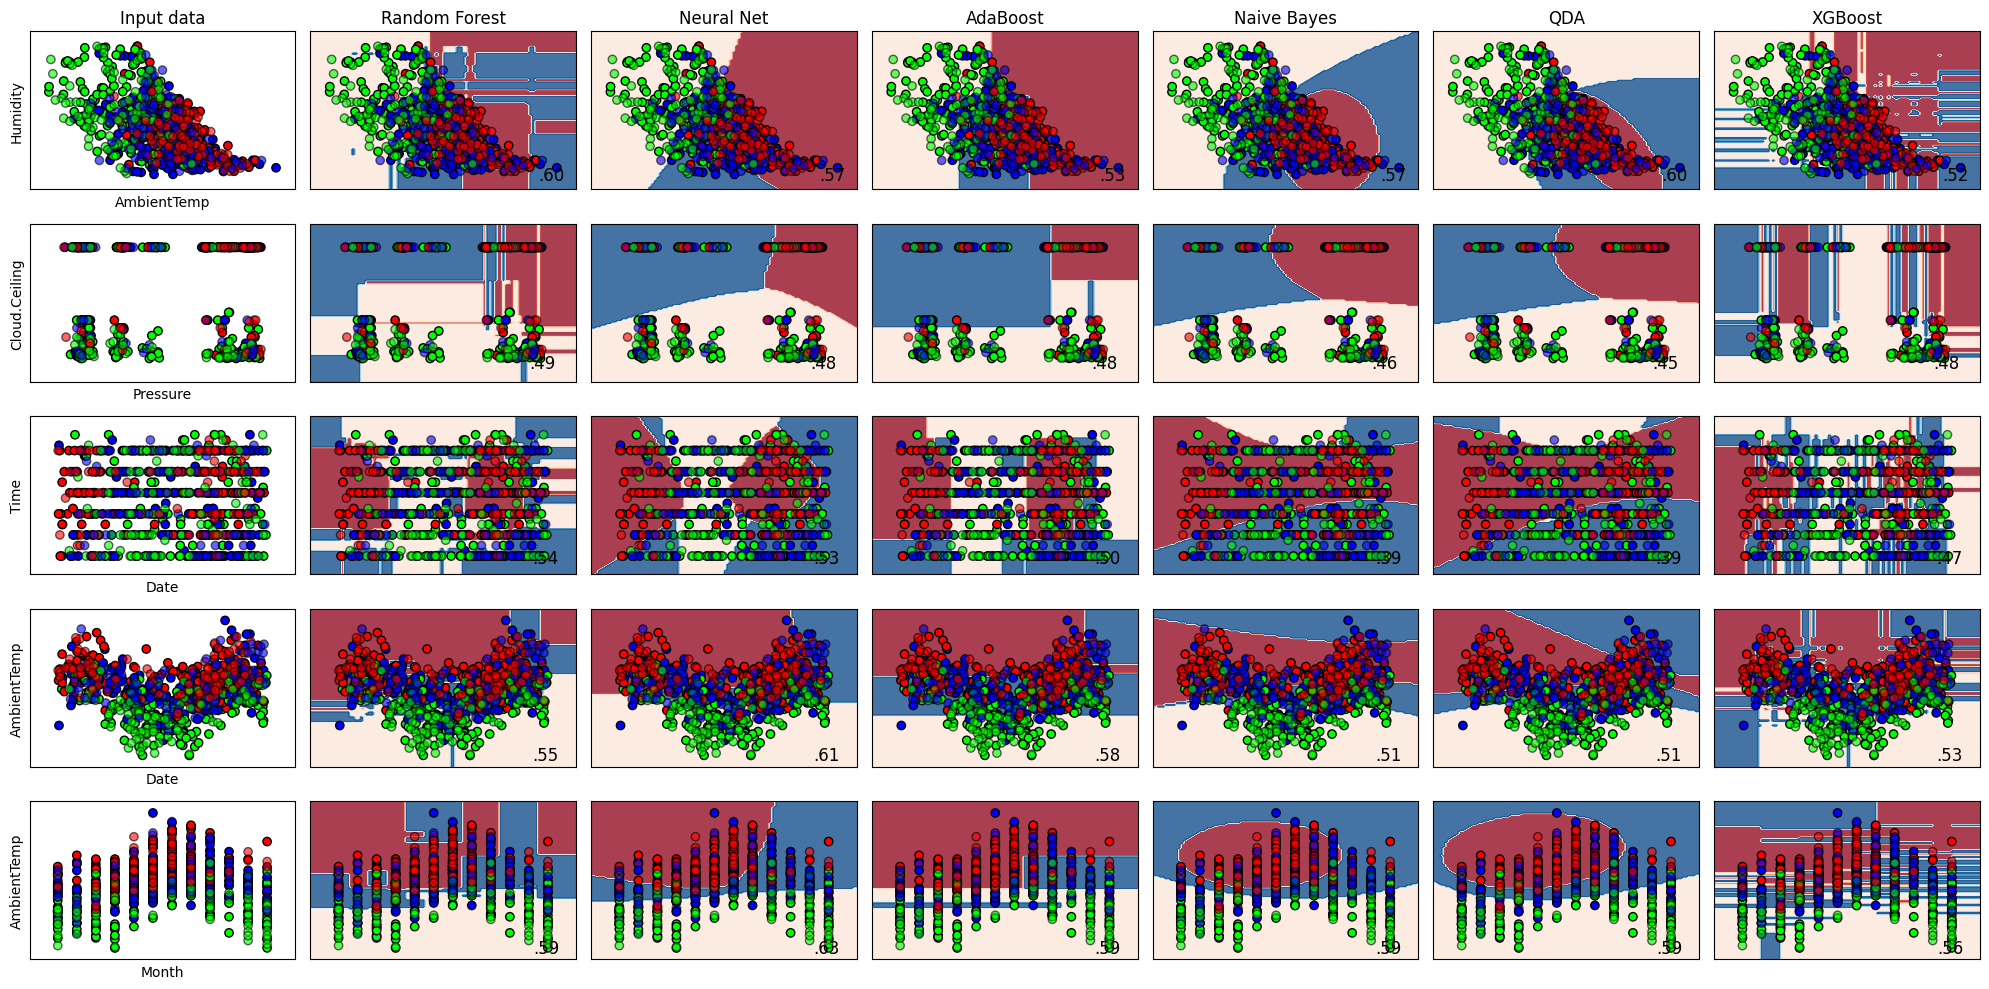

,PolyPwr_class,PolyPwr_class_num
21035,medium,2
21036,medium,2
21037,medium,2
21038,medium,2
21039,medium,2
21040,medium,2
21041,medium,2
21042,low,1
21043,medium,2
21044,low,1


In [ ]:
datasets = [
    ('AmbientTemp', 'Humidity'),
    ('Pressure', 'Cloud.Ceiling'),
    ('Date', 'Time'),
    ('Date', 'AmbientTemp'),
    ('Month', 'AmbientTemp')
]

# transforming polypwr_class into numeric labels (high: 0, low: 1, medium: 2)
encoder = LabelEncoder()
df3['PolyPwr_class_num'] = encoder.fit_transform(df3['PolyPwr_class'])


figure = plt.figure(figsize=(20, 10))
i = 1

#creating a smaller sample
df3_small = df3.sample(n=800, random_state=42).copy()

# using numeric column
y_all = df3_small['PolyPwr_class_num'].values


for ds_cnt, (f1, f2) in enumerate(datasets):
    # slice your dataframe
    X = df3_small[[f1, f2]].values
    y = y_all

    # standardize for mean= 0, std= 1
    X = StandardScaler().fit_transform(X)
    # split data, half is used for training, half for testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # defining boundaries for plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # setting up colormaps, cm is for decision boundary and cm_bright is for data points
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    # Input data plot
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plotting train and test points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(f"{f2}")
    ax.set_xlabel(f"{f1}")
    i += 1

    # Loop through classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # draws decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, response_method="predict", cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, f"{score:.2f}".lstrip("0"), size=12,
                horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()

df3[['PolyPwr_class', 'PolyPwr_class_num']].tail(10)

In [ ]:
X = df3.drop(columns=['PolyPwr', 'PolyPwr_class', 'PolyPwr_class_num'])
y = df3['PolyPwr_class_num']

X = X.select_dtypes(include='number')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.3f}")
#Accuracy of classifiers classifying the training data?

#difference between using df3 and df: neural net, and QDA are .3 and .2 higher. Rest are unchanged

Random Forest: 0.684
Neural Net: 0.518
AdaBoost: 0.668
Naive Bayes: 0.639
QDA: 0.660
XGBoost: 0.788


In [ ]:
#Trying to do XGBoost with regression, not classifier: copied from above
X = df3.drop(columns=['PolyPwr', 'PolyPwr_class', 'PolyPwr_class_num'])
y = df3['PolyPwr']

# X = X.select_dtypes(include='number')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#XGBClassifier() --> XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgbRegressor = XGBRegressor(n_estimators=150, max_depth=6, learning_rate=0.1, random_state=42)
xgbRegressor.fit(X_train, y_train)
score = xgbRegressor.score(X_test, y_test)
print(f"XGBoost Regression: {score:.3f}")

XGBoost Regression: 0.680


In [ ]:
print(df3.columns,"\n")
print(f"AmbientTemp (air): minimum temp: {df3["AmbientTemp"].min()}\nmaximum temp: {df3["AmbientTemp"].max()}\nI'm guessing this is in \033[1mCelcius\033[0m and its just really hot where they have solar panels\n")
print(f"Pressure: 1013mbar is average atmospheric pressure. IDK what the unit is but it goes from {df3['Pressure'].min()} to {df3['Pressure'].max()}\n")
not722 = df3[df3["Cloud.Ceiling"] <722.0]
print(f"Cloud.Ceiling: max (not including the 722 numbers which idk what they represent): {not722["Cloud.Ceiling"].max()}. 722 represents {((df3["Cloud.Ceiling"].count() - not722["Cloud.Ceiling"].count())/df3["Cloud.Ceiling"].count()):.4f} fraction of the original sample")
df3.sample(n = 5, random_state = 1)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month',
       'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'PolyPwr_class', 'PolyPwr_class_num'],
      dtype='object') 

AmbientTemp (air): minimum temp: -19.98177
maximum temp: 65.73837
I'm guessing this is in Celcius and its just really hot where they have solar panels

Pressure: 1013mbar is average atmospheric pressure. IDK what the unit is but it goes from 781.7 to 1029.5

Cloud.Ceiling: max (not including the 722 numbers which idk what they represent): 300. 722 represents 0.6774 fraction of the original sample


,Date,Time,Latitude,Longitude,Altitude,Month,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,PolyPwr_class,PolyPwr_class_num
13060,487.25,15.00,41.13,-95.75,380,9,28.51562,38.12172,15.73394,17,10.0,976.8,722,medium,2
9909,159.50,11.50,33.90,-117.26,458,10,48.60840,22.57996,5.54791,6,10.0,957.9,31,low,1
16300,115.00,11.00,38.16,-121.56,1,9,44.86084,26.50505,12.84546,14,10.0,1010.6,722,medium,2
10949,397.75,13.00,33.90,-117.26,458,6,22.72949,37.36389,20.33438,9,10.0,959.2,722,high,0
4344,373.75,12.25,41.15,-111.99,1370,6,28.32642,27.72362,25.26033,16,10.0,856.3,60,high,0


In [ ]:
#Example to see if XGBRegressor works

#Example 1: trying to get a high energy output
highExample = np.array([[300, 13, 30, -60, 100, 7, 50, 50, 10, 10, 1013, 722]])  # 1 sample, 12 features. Doesn't include PolyPwr or alternatives
print(f"High predicted energy output: {xgbRegressor.predict(highExample)}")
lowExample = np.array([[100, 10.5, 60, -60, 1200, 1, 50, 0, 10, 5, 1013, 722]]) #idk why i need double brackets
print(f"Low predicted energy output: {xgbRegressor.predict(lowExample)}")

High predicted energy output: [22.700659]
Low predicted energy output: [1.7174871]


In [ ]:
#we need to now see if we put in an example of these are our variables, now what is the energy output?
#what do we code?

***okay so bascially we this code compares Linear Regression, Ridge, and Lasso models by preparing the datset and tells us which predicts the PolyPwr more accurelty

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Define a list of regression models to evaluate
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("XGBoost Regression", XGBRegressor(n_estimators=150, max_depth=6, learning_rate=0.1, random_state=42))
]

# Separate features (X) and target (y)
X = df3.drop(columns=['PolyPwr', 'PolyPwr_class', 'PolyPwr_class_num'])
y = df3['PolyPwr']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate through the models, train, and evaluate
for name, regressor in regressors:
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print(f"{name}: {score:.3f}")

df3.shape
#pls read when output of this cell is given
# Each model prints its R² score, which measures how well it predicts PolyPwr (1.0 = perfect).
# Linear, Ridge, and Lasso all score around 0.47, meaning they explain ~47% of the variance.
# Lasso gives a convergence warning because the features aren’t scaled, so it struggles to optimize.
# XGBoost performs best (0.68) because it captures non-linear patterns and doesn’t require feature scaling.


Linear Regression: 0.475
Ridge: 0.475


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+03, tolerance: 7.462e+01
  model = cd_fast.enet_coordinate_descent(


Lasso: 0.467
XGBoost Regression: 0.680


(21045, 15)

<Axes: >

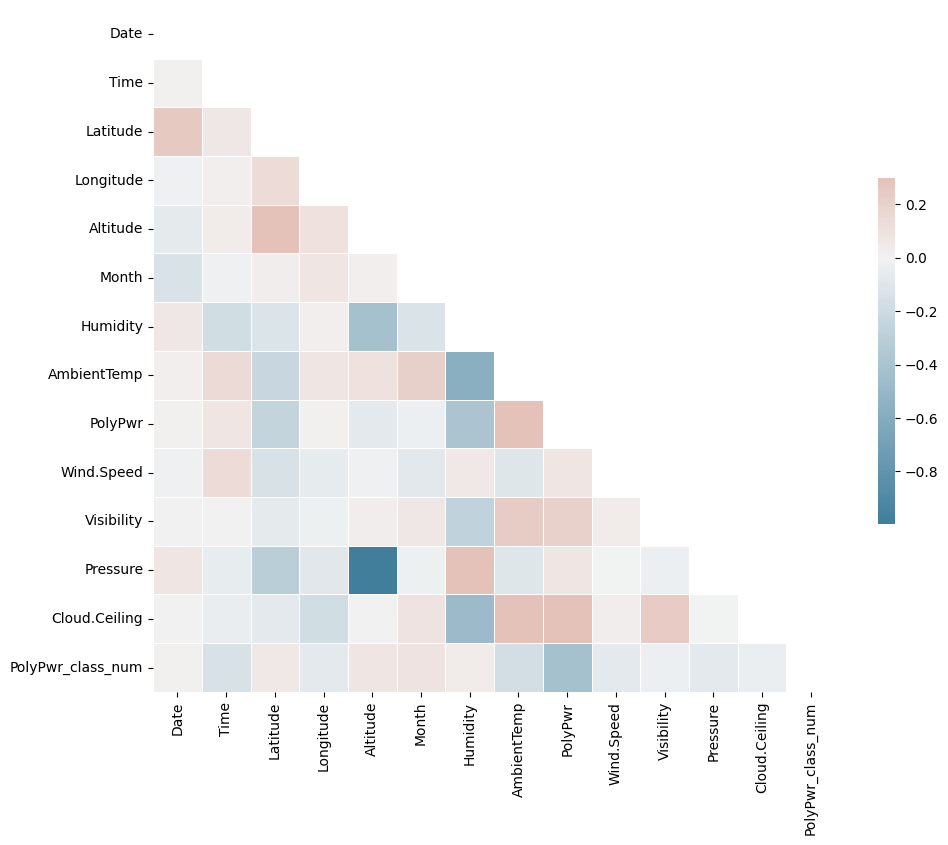

In [ ]:
#Seaborn Correlation matrix
from string import ascii_letters

# Compute the correlation matrix
corr = df3.drop(columns=["PolyPwr_class"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

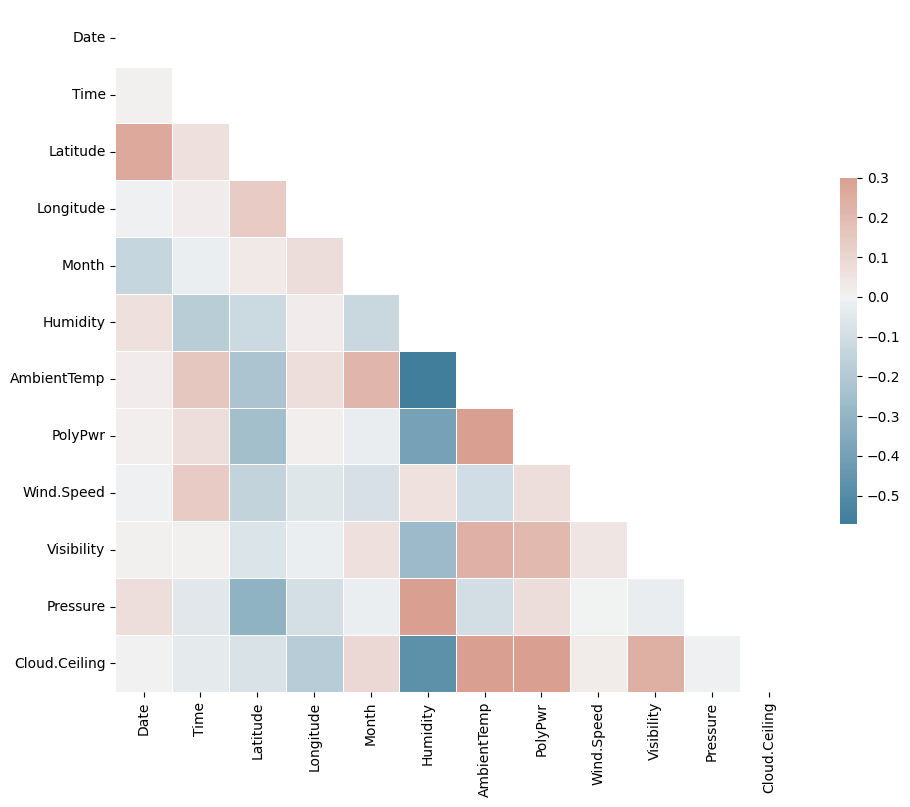

In [ ]:
corr = df3.drop(columns=["PolyPwr_class", "Altitude", "PolyPwr_class_num"]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

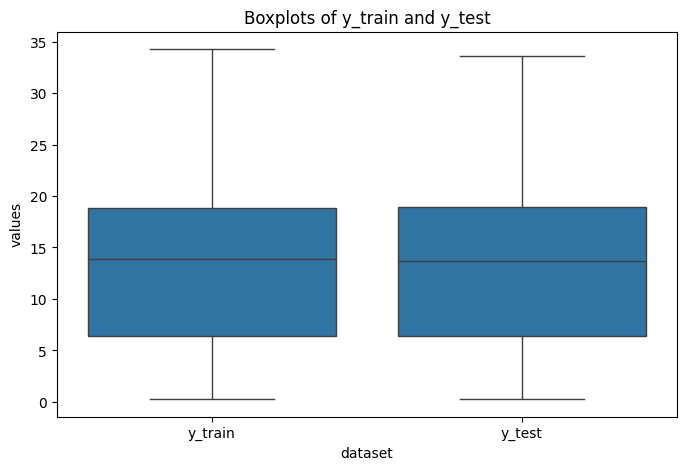

In [ ]:
df = pd.DataFrame({
    'values': list(y_train) + list(y_test),
    'dataset': ['y_train'] * len(y_train) + ['y_test'] * len(y_test)
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='dataset', y='values')
plt.title('Boxplots of y_train and y_test')
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(xgbRegressor, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.67826816 0.67047795 0.67246452 0.68928779 0.68881453]
Mean score: 0.6798625907526594
